# Prevendo a suscetibilidade à AVCs usando Machine Learning

Estarei utilizando o seguinte caminho durante esse _notebook_: 

1. Definição do Problema
2. Dados
3. Avaliação dos Dados
4. Recursos do DataSet
5. Modelagem
6. Conclusão

## **1. Definição do Problema**

  O objetivo principal desse projeto é, utilizando os dados disponíveis no Dataset, classificar se um indivíduo tem suscetibilidade ou não a uma AVC.

## **2. Dados**

  Os dados utilizados foram extraídos do Kaggle e estão disponíveis em: (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data), créditos ao autor: https://www.kaggle.com/fedesoriano

## **3.Avaliação dos Dados**

  O resultado esperado é identificar um modelo que tenha sucesso em prever corretamente o maior número de possíveis casos de AVC.

## **4.Recursos**

  Esse dataset possui as seguintes colunas (Traduzidas diretamente do Kaggle): 
  1) id: identificador único
  2) gender: "Masculino", "Feminino" ou "Outro"
  3) age: idade do paciente
  4) hypertension: 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
  5) heart_disease: 0 se o paciente não tiver doenças cardíacas, 1 se o paciente tiver doença cardíaca
  6) ever_married: "Não" ou "Sim"
  7) work_type: "Crianças", "Emprego público" (Govt_job), "Nunca trabalhou" (Never_worked), "Privado" ou "Autônomo" (Self-employed)
  8) Residence_type: "Rural" ou "Urbano"
  9) avg_glucose_level: nível médio de glicose no sangue
  10) bmi: índice de massa corporal
  11) smoking_status: "Ex-fumante" (formerly smoked), "Nunca fumou" (never smoked), "Fuma" (smokes) ou  "Desconhecido" (Unknown)*
  12) stroke: 1 se o paciente teve um AVC (acidente vascular cerebral) ou 0 se não teve

## Preparando as ferramentas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from tools import evaluate_classification, metricCompare

np.random.seed(777)

## Importação e Análise Exploratória dos Dados

In [3]:
df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.isna().sum()
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# TODO: Drop ID, Distribuição das idades ,Tipos unicos de trabalho,Buscar Correlação entre os dados, OneHotEncode em dados categóricos.

df.drop(columns="id", inplace=True)

In [6]:
print(df["work_type"].unique())
df["smoking_status"].unique()

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: xlabel='stroke'>

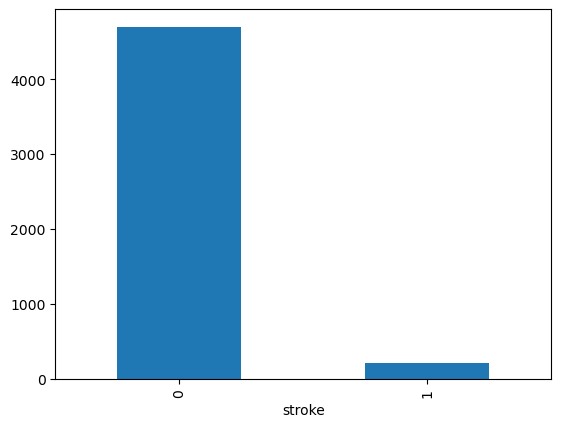

In [8]:
df["stroke"].value_counts().plot(kind="bar")

In [9]:
pd.crosstab(df["stroke"], df["gender"])

gender,Female,Male,Other
stroke,,,
0,2777,1922,1
1,120,89,0


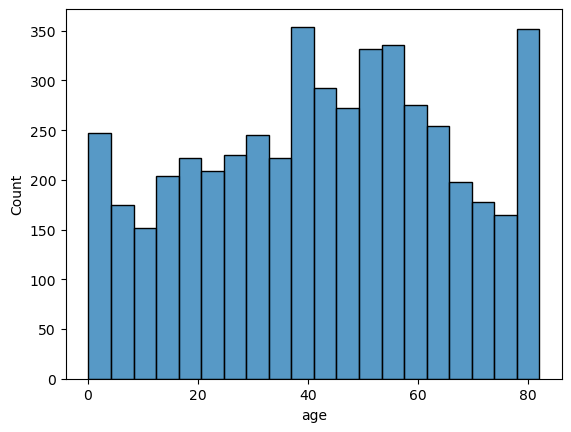

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

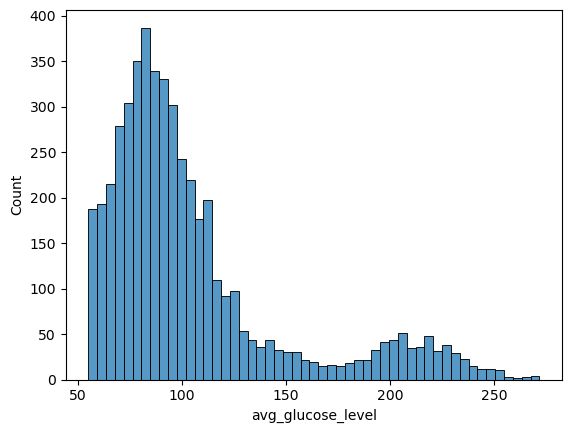

In [10]:
sns.histplot(df, x="age")
plt.show()
sns.histplot(df, x="avg_glucose_level")

In [11]:
pd.crosstab(df["hypertension"], df["stroke"])

stroke,0,1
hypertension,,
0,4309,149
1,391,60


<Axes: >

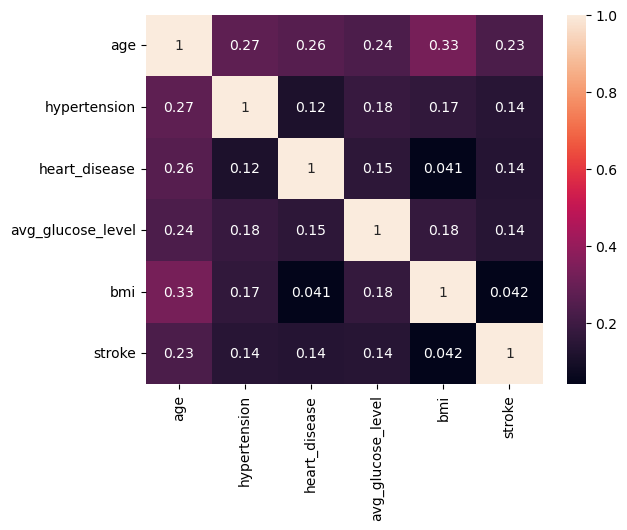

In [12]:
categoric_columns = ["gender","ever_married","work_type","Residence_type","smoking_status"]

sns.heatmap(df.drop(columns=categoric_columns).corr(), annot=True)

É possível notar que os casos de AVC se concentram após os 40 anos mas se espalham de forma considerável entre o BMI

<Axes: xlabel='age', ylabel='bmi'>

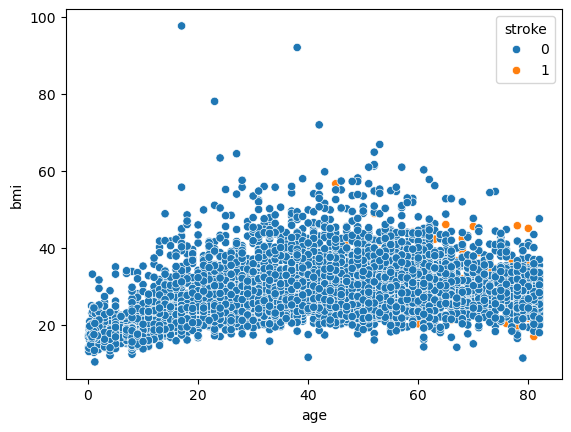

In [13]:
sns.scatterplot(data=df, x="age", y="bmi", hue="stroke")

In [14]:
df["age"] = df["age"].astype(int)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## **5. Modelagem - Machine Learning**

In [15]:
X = df.drop(columns="stroke")
y = df["stroke"]

In [16]:
np.random.seed(777)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer( [("oneHot", OneHotEncoder(), categoric_columns)], remainder="passthrough")
df_transformed = transformer.fit_transform(X)
Xt = pd.DataFrame(df_transformed)
Xt

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.6
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92,32.5
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23,34.4
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,103.08,18.6
4905,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,125.20,40.0
4906,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,82.99,30.6
4907,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,166.29,25.6


In [17]:
np.random.seed(777)


X_train, X_test, y_train, y_test = train_test_split(Xt,y,test_size=0.3, random_state=777)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
np.random.seed(777)
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

### Utilizando RandomForestClassifier

In [20]:
np.random.seed(777)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_resampled,y_resampled)
clf.score(X_test,y_test)

y_preds = clf.predict(X_test)
baseline_metrics = evaluate_classification(y_test, y_preds)

Accuracy: 91.79%
Precision: 9.09%
Recall: 8.96%
F1: 9.02%


In [21]:
cross_val_score(clf, Xt, y, cv=5)

array([0.95315682, 0.95723014, 0.95723014, 0.95519348, 0.95820591])

In [22]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1406
           1       0.09      0.09      0.09        67

    accuracy                           0.92      1473
   macro avg       0.52      0.52      0.52      1473
weighted avg       0.92      0.92      0.92      1473



Utilizando ROC Curve a fim de determinar o melhor threshold.

In [23]:
np.random.seed(777)


y_preds_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_preds_prob)

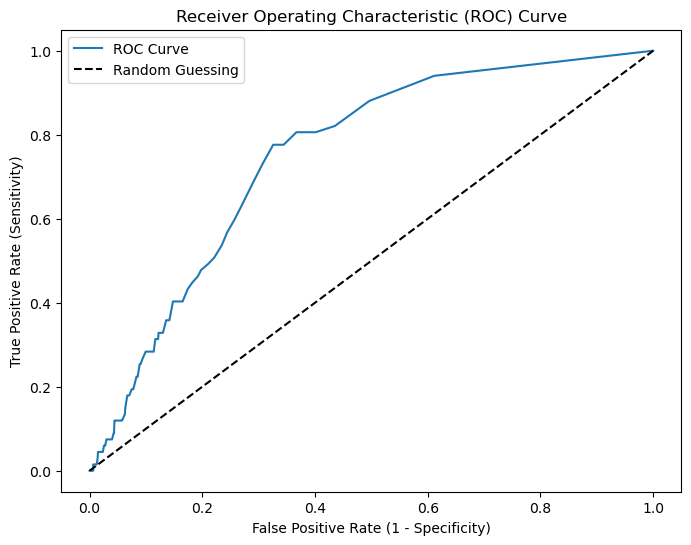

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [25]:
np.random.seed(777)


from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_preds_prob)

y_preds_prob = clf.predict_proba(X_test)[:, 1]
y_preds = (y_preds_prob >= 0.30).astype(int)

print(pd.DataFrame(y_preds).value_counts())
print(pd.DataFrame(y_test).value_counts())

0    1294
1     179
Name: count, dtype: int64
stroke
0         1406
1           67
Name: count, dtype: int64


In [26]:
np.random.seed(777)

rfc_handtunned_metrics = evaluate_classification(y_test, y_preds)

Accuracy: 85.88%
Precision: 10.61%
Recall: 28.36%
F1: 15.45%


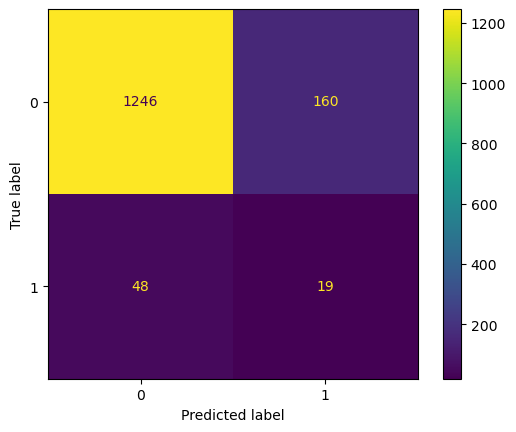

In [27]:
np.random.seed(777)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Com essa Confusion Matrix podemos ver que ainda existe um grande número de falso-negativos e de falso positivos

In [28]:
np.random.seed(777)

metricCompare(rfc_handtunned_metrics, baseline_metrics)

[-5.90631365  1.52361605 19.40298507  6.42459808]


In [29]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1406
           1       0.11      0.28      0.15        67

    accuracy                           0.86      1473
   macro avg       0.53      0.58      0.54      1473
weighted avg       0.92      0.86      0.89      1473



**Tunando o RandomForestClassifier**

Utilizando o Randomized Search para achar os melhores Hyperparameters

In [30]:
grid = {"max_depth": [10 ,20, 30, 50, 100] ,"max_features": ["sqrt"], "min_samples_leaf": [1,2], "min_samples_split": [1,2], "n_estimators": [450,500,550]}

grid2 = {"max_depth": [20, 30, 50, 100] ,"max_features": ["sqrt"], "min_samples_leaf": [1,2,4], "min_samples_split": [2,4,6], "n_estimators": [80, 90, 100, 150, 500, 1000]}

In [31]:
np.random.seed(777)

clf_tunning = RandomForestClassifier(n_jobs=-1)

rs_clf = RandomizedSearchCV(estimator=clf_tunning, param_distributions=grid2, n_iter=10, cv = 5)
rs_clf.fit(X_resampled, y_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [20, 30, 50, 100],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [80, 90, 100, 150, 500,
                                                         1000]})

Melhores Hyperparameters:

In [32]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

Calculando as métricas com os novos Hyperparameters

In [33]:
np.random.seed(777)


rs_y_preds = rs_clf.predict(X_test)

rs_y_preds_prob = rs_clf.predict_proba(X_test)[:, 1]
rs_y_preds = (rs_y_preds_prob >= 0.30).astype(int)

rs_metrics = evaluate_classification(y_test, rs_y_preds)
metricCompare(rs_metrics, baseline_metrics)

Accuracy: 85.74%
Precision: 9.60%
Recall: 25.37%
F1: 13.93%
[-6.04209097  0.51361068 16.41791045  4.91186984]


**Pode-se notar que com esse tunning nos Hyperparameters tivemos um aumento de 16% na métrica de _Recall_ em relação ao primeiro treinamento do modelo**

Utilizando o Grid Search para achar os melhores Hyperparameters!

In [34]:
np.random.seed(777)

grid_optimized = {"max_depth": [100,100] ,"max_features": ["sqrt"], "min_samples_leaf": [1], "min_samples_split": [4], "n_estimators": [450,500]}

clf_tunning = RandomForestClassifier(n_jobs=-1)

#Setting up GridSearchCV
gs_clf = GridSearchCV(estimator=clf_tunning, param_grid=grid_optimized, cv = 5)

gs_clf.fit(X_resampled,y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [100, 100], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [4],
                         'n_estimators': [450, 500]})

Melhores Hyperparameters segundo o GridSearch.

In [35]:
gs_clf.best_params_

{'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Utilizando os Hyperparameters encontrados para criar uma nova métrica.

In [36]:
np.random.seed(777)


gs_y_preds_prob = gs_clf.predict_proba(X_test)[:, 1]
gs_y_preds = (gs_y_preds_prob >= 0.30).astype(int)

gs_metrics = evaluate_classification(y_test, gs_y_preds)

metricCompare(gs_metrics, baseline_metrics)

Accuracy: 85.74%
Precision: 9.60%
Recall: 25.37%
F1: 13.93%
[-6.04209097  0.51361068 16.41791045  4.91186984]


Comparação entre todas as métricas.

In [37]:
print(baseline_metrics)
print(rfc_handtunned_metrics)
print(rs_metrics)
print(gs_metrics)

{'acc': 0.9178547182620502, 'prec': 0.09090909090909091, 'recall': 0.08955223880597014, 'f1': 0.09022556390977442}
{'acc': 0.8587915818058385, 'prec': 0.10614525139664804, 'recall': 0.2835820895522388, 'f1': 0.15447154471544716}
{'acc': 0.8574338085539714, 'prec': 0.096045197740113, 'recall': 0.2537313432835821, 'f1': 0.13934426229508198}
{'acc': 0.8574338085539714, 'prec': 0.096045197740113, 'recall': 0.2537313432835821, 'f1': 0.13934426229508198}


Confusion Matrix da Métrica de Tunning Manual

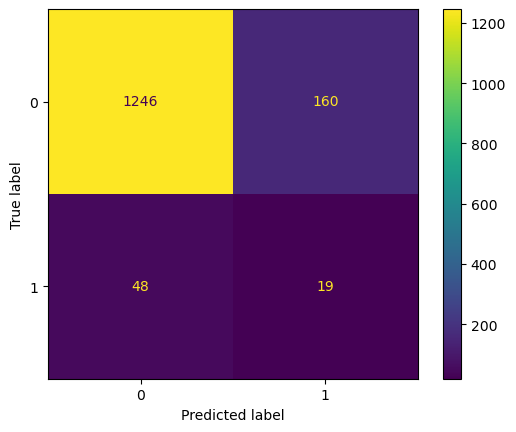

In [50]:
cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Ao aumentar o tamanho da amostra de testes, utilizar o oversampling, tunnar os hyperparametros e alterar o _threshold_ com base na curva ROC, foi possível observar uma certa melhora no _Recall_ do RandomForestClassifier, mas mesmo com essa melhora é válido testar outros modelos.

### **Utilizando LogisticRegression**

In [39]:
np.random.seed(777)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_resampled,y_resampled)

LogisticRegression()

In [40]:
lg_y_preds = model.predict(X_test)

Métricas base da Logistic Regression

In [41]:
lg_baseline_metrics = evaluate_classification(y_test, lg_y_preds)

Accuracy: 76.04%
Precision: 11.76%
Recall: 65.67%
F1: 19.95%


Confusion Matrix da Logistic Regression

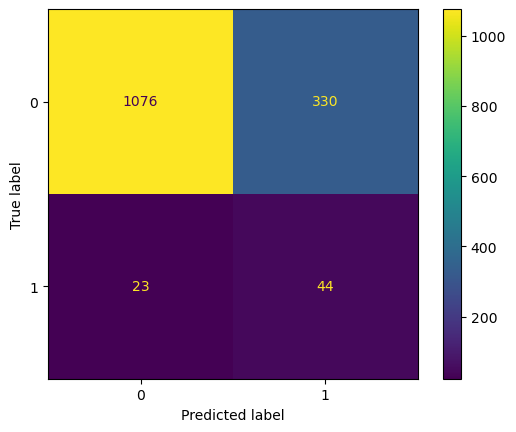

In [42]:
cm = confusion_matrix(y_test, lg_y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

**Tunando os Hyperparameters**

In [43]:
grid_lg = {"solver": ["saga", "liblinear", "newton-cg", "newton-cholesky"], "penalty": ["l2"], "C": [10, 12, 15, 25]}

In [44]:
np.random.seed(777)

model_tunning = LogisticRegression(n_jobs=1, max_iter=1000)

gs_log_model = GridSearchCV(estimator=model_tunning, param_grid=grid_lg, cv = 5)
gs_log_model.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, n_jobs=1),
             param_grid={'C': [10, 12, 15, 25], 'penalty': ['l2'],
                         'solver': ['saga', 'liblinear', 'newton-cg',
                                    'newton-cholesky']})

In [45]:
gs_log_model.best_estimator_

LogisticRegression(C=10, max_iter=1000, n_jobs=1, solver='saga')

Criando nova métrica com os Hyperparameters encontrados.

In [46]:
rslg_y_preds = gs_log_model.predict(X_test)
log_tuned_metrics = evaluate_classification(y_test, rslg_y_preds)

Accuracy: 76.04%
Precision: 11.76%
Recall: 65.67%
F1: 19.95%


ROC Curve do modelo com hyperparameters modificados

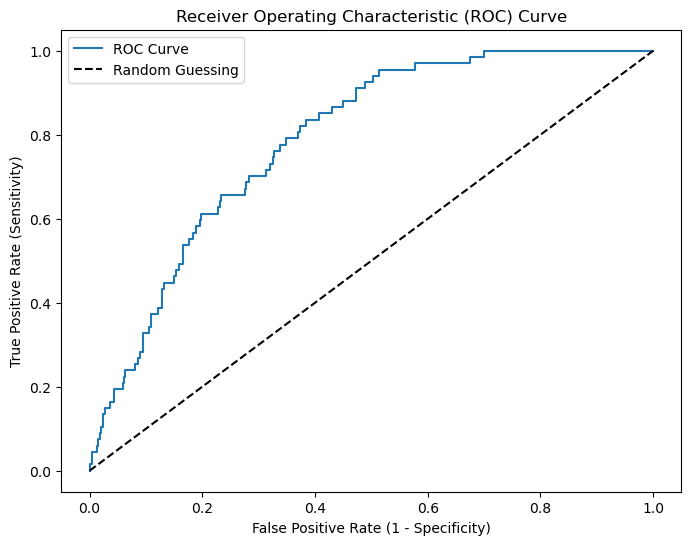

In [47]:
np.random.seed(777)


rslg_y_preds = gs_log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rslg_y_preds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Alterando o threshold.

In [48]:
np.random.seed(777)

roc_auc_score(y_test, lg_y_preds)

lg_y_preds_prob = gs_log_model.predict_proba(X_test)[:, 1]
lg_y_preds = (lg_y_preds_prob > 0.40).astype(int)

log_tuned_metrics = evaluate_classification(y_test, lg_y_preds)

Accuracy: 70.60%
Precision: 10.22%
Recall: 70.15%
F1: 17.84%


Confusion Matrix com hyperparameters e threshold alterados.

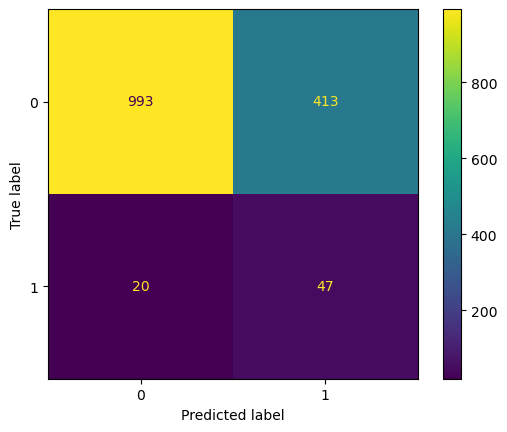

In [49]:
cm = confusion_matrix(y_test, lg_y_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## **6. Conclusão**

**Qual modelo escolher**? 

Dessa forma, após realizar o _Tunning_ no modelo de _Logistic Regression_, é perceptível uma grande melhora na váriavel _Recall_ em relação ao modelo de _RandomForestClassifier_, apesar do RFC ter uma _Accuracy_ maior (Que significa que em termos gerais, o modelo acertou mais) o LR diagnostica com mais sucesso pacientes que tem sucetibilidade à AVCs, mesmo que para esse resultado gere alguns diagnosticos falso-positivos. 

Essa diferença na relação Accuracy/Recall pode ser aumentada ou atenuada dependendo do _threshold_ selecionado (Atualmente está em 40%), quanto maior esse número teremos menos acertos em relação a casos possíveis de AVC mas o número gerado de falso-positivos será bem menor, aumentar o número gera um efeito contrário.

No sentido de prever uma futura AVC o modelo de _Logistic Regression_ faz mais sentido, já que os efeitos de uma previsão correta superam os efeitos negativos de um resultado falso-positivo, mesmo que o preferível fosse um modelo que prevê corretamente sem gerar dados falsos.

Mesmo gerando esses falso-positivos, a precisão para acertar corretamente um diagnóstico ainda não é das melhores, um dos principais causadores dessa deficiência é falta de dados da Classe 1 (Pessoas suscetíveis a AVCs), apesar de ter utilizado uma técnica de _oversampling_ desses casos não é o suficiente para garantir uma análise 100% (ou próxima disso) precisa.

Após analisar algumas outras soluções para esse problema no Kaggle, a maioria dos usuários também chegaram a números parecidos mesmo utilizando outras técnicas e modelos, logo acredito que essa falta de dados seja o principal fator limitante nessa previsão.
